In [3]:
from google.colab import drive
drive.mount  ('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/content/drive/MyDrive/BINAR DSC/train_preprocess.tsv",sep="\t", names=["text","label"])

In [6]:
df

text     label
0      warung ini dimiliki oleh pengusaha pabrik tahu...  positive
1      mohon ulama lurus dan k212 mmbri hujjah partai...   neutral
2      lokasi strategis di jalan sumatera bandung . t...  positive
3      betapa bahagia nya diri ini saat unboxing pake...  positive
4      duh . jadi mahasiswa jangan sombong dong . kas...  negative
...                                                  ...       ...
10995                                       tidak kecewa  positive
10996  enak rasa masakan nya apalagi kepiting yang me...  positive
10997        hormati partai-partai yang telah berkoalisi   neutral
10998  pagi pagi di tol pasteur sudah macet parah , b...  negative
10999  meskipun sering belanja ke yogya di riau junct...  positive

[11000 rows x 2 columns]

In [7]:
df.head ()

text     label
0  warung ini dimiliki oleh pengusaha pabrik tahu...  positive
1  mohon ulama lurus dan k212 mmbri hujjah partai...   neutral
2  lokasi strategis di jalan sumatera bandung . t...  positive
3  betapa bahagia nya diri ini saat unboxing pake...  positive
4  duh . jadi mahasiswa jangan sombong dong . kas...  negative

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10995     True
10996    False
10997     True
10998    False
10999    False
Length: 11000, dtype: bool

In [9]:
df.duplicated().sum()

67

In [10]:
df= df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
df.isna().sum()/df.shape[0]

text     0.0
label    0.0
dtype: float64

In [13]:
df['total_char'] = df.text.apply(len)

<ipython-input-13-a774cf4f24d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_char'] = df.text.apply(len)


In [14]:
df

text     label  total_char
0      warung ini dimiliki oleh pengusaha pabrik tahu...  positive         404
1      mohon ulama lurus dan k212 mmbri hujjah partai...   neutral         102
2      lokasi strategis di jalan sumatera bandung . t...  positive         184
3      betapa bahagia nya diri ini saat unboxing pake...  positive          93
4      duh . jadi mahasiswa jangan sombong dong . kas...  negative         214
...                                                  ...       ...         ...
10993  f - demokrat dorong upaya kemandirian energi n...   neutral          53
10994                                        tidak bosan  positive          11
10996  enak rasa masakan nya apalagi kepiting yang me...  positive         156
10998  pagi pagi di tol pasteur sudah macet parah , b...  negative          67
10999  meskipun sering belanja ke yogya di riau junct...  positive         387

[10933 rows x 3 columns]

In [15]:
df["total_word"] = df['text'].apply(lambda sent: len(sent.split()))

<ipython-input-15-8202cc25d967>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_word"] = df['text'].apply(lambda sent: len(sent.split()))


In [16]:
df

text     label  \
0      warung ini dimiliki oleh pengusaha pabrik tahu...  positive   
1      mohon ulama lurus dan k212 mmbri hujjah partai...   neutral   
2      lokasi strategis di jalan sumatera bandung . t...  positive   
3      betapa bahagia nya diri ini saat unboxing pake...  positive   
4      duh . jadi mahasiswa jangan sombong dong . kas...  negative   
...                                                  ...       ...   
10993  f - demokrat dorong upaya kemandirian energi n...   neutral   
10994                                        tidak bosan  positive   
10996  enak rasa masakan nya apalagi kepiting yang me...  positive   
10998  pagi pagi di tol pasteur sudah macet parah , b...  negative   
10999  meskipun sering belanja ke yogya di riau junct...  positive   

       total_char  total_word  
0             404          66  
1             102          17  
2             184          33  
3              93          17  
4             214          38  
...           ...         ...  
10993          53           8  
10994          11           2  
10996         156          26  
10998          67          13  
10999         387          68  

[10933 rows x 4 columns]

In [17]:
df.head(10)

text     label  total_char  \
0  warung ini dimiliki oleh pengusaha pabrik tahu...  positive         404   
1  mohon ulama lurus dan k212 mmbri hujjah partai...   neutral         102   
2  lokasi strategis di jalan sumatera bandung . t...  positive         184   
3  betapa bahagia nya diri ini saat unboxing pake...  positive          93   
4  duh . jadi mahasiswa jangan sombong dong . kas...  negative         214   
5  makanan beragam , harga makanan di food stall ...  positive         161   
6  pakai kartu kredit bca tidak untung malah rugi...  negative          52   
7  tempat unik , bagus buat foto , makanan enak ,...  positive         227   
8  saya bersama keluarga baru saja menikmati peng...  positive         391   
9                                          bersyukur  positive           9   

   total_word  
0          66  
1          17  
2          33  
3          17  
4          38  
5          28  
6           9  
7          42  
8          68  
9           1

In [18]:
df.mean()

<ipython-input-18-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


total_char    189.614561
total_word     33.060551
dtype: float64

In [19]:
df.median()

<ipython-input-19-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


total_char    161.0
total_word     28.0
dtype: float64

In [20]:
df['total_char'].mode()

0    120
Name: total_char, dtype: int64

In [21]:
df['total_word'].mode()

0    10
Name: total_word, dtype: int64

In [22]:
range_total_char = df['total_char'].max() -df['total_char'].min()

In [23]:
range_total_char

564

In [25]:
range_total_word = df['total_word'].max() -df['total_word'].min()

In [26]:
range_total_word

109

In [27]:
q1_char = df['total_char'].quantile(0.25)
q1_char

91.0

In [28]:
q2_char = df['total_char'].quantile(0.5)
q2_char

161.0

In [29]:
q3_char = df['total_char'].quantile(0.75)
q3_char

276.0

In [30]:
q1_word = df['total_word'].quantile(0.25)
q1_word

16.0

In [31]:
q2_word = df['total_word'].quantile(0.5)
q2_word

28.0

In [32]:
q3_word = df['total_word'].quantile(0.75)
q3_word

48.0

In [33]:
iqr_char = q3_char - q1_char
iqr_char

185.0

In [34]:
lower_limit_char = q1_char - 1.5 * iqr_char
lower_limit_char

-186.5

In [35]:
upper_limit_char = q1_char + 1.5 * iqr_char
upper_limit_char

368.5

In [36]:
df.skew()

<ipython-input-36-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


total_char    0.560780
total_word    0.536978
dtype: float64

In [37]:
df.kurtosis()

<ipython-input-37-c7edf97eb14c>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurtosis()


total_char   -0.756575
total_word   -0.769288
dtype: float64

<Axes: ylabel='label'>

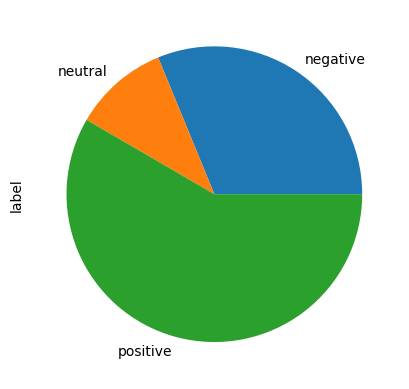

In [38]:
df.groupby('label').label.count().plot(kind='pie')

<Axes: >

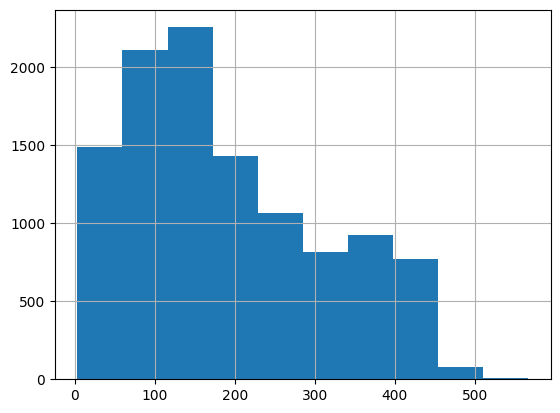

In [39]:
df.total_char.hist()

In [40]:
df_negative = df[df['label'] =='negative']

array([[<Axes: title={'center': 'total_char'}>,
        <Axes: title={'center': 'total_word'}>]], dtype=object)

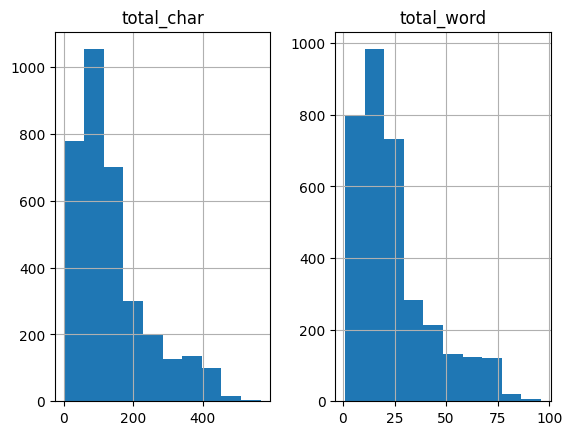

In [42]:
df_negative.hist()

In [43]:
df_neutral = df[df['label'] =='neutral']

array([[<Axes: title={'center': 'total_char'}>,
        <Axes: title={'center': 'total_word'}>]], dtype=object)

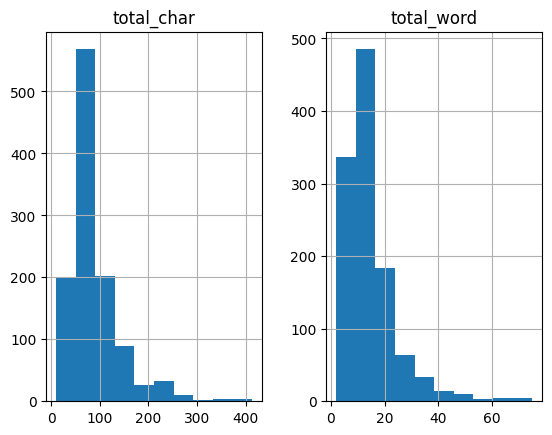

In [44]:
df_neutral.hist()

In [45]:
df_positive = df[df['label'] =='positive']

array([[<Axes: title={'center': 'total_char'}>,
        <Axes: title={'center': 'total_word'}>]], dtype=object)

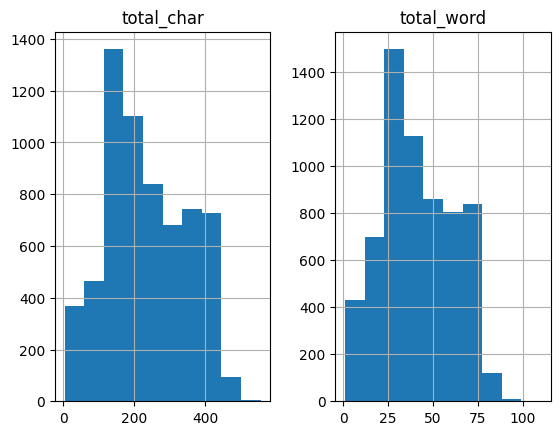

In [46]:
df_positive.hist()

In [47]:
#cara menampilkan grafik dalam wordclaud

from wordcloud import WordCloud
text = ' '.join(df['text'])
wordcloud = WordCloud().generate(text)

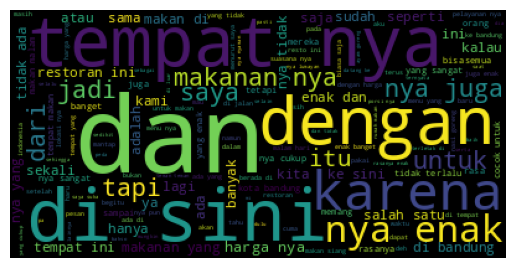

In [48]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [50]:
#cara filter dengan stop word, masukan dulu csv stopword

df_stopword = pd.read_csv('/content/drive/MyDrive/BINAR DSC/stopwordbahasa.csv', names=['stopword'])

In [51]:
df_stopword

stopword
0        ada
1     adalah
2     adanya
3     adapun
4       agak
..       ...
769      nih
770     wkwk
771     haha
772       eh
773       ah

[774 rows x 1 columns]

In [52]:
text = ' '.join(df['text'])

In [53]:
text

'warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal ! mohon ulama lurus dan k212 mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah-pecah lokasi strategis di jalan sumatera bandung . tempat nya nyaman terutama sofa di lantai 2 . paella nya enak , sangat pas dimakan dengan minum bir dingin . appetiser nya juga enak-enak . betapa bahagia nya diri ini saat unboxing paket dan barang nya bagus ! menetapkan beli lagi ! duh . jadi mahasiswa jangan sombong dong . kasih kartu kuning segala . belajar dulu yang baik , tidak usahlah ikut-ikut politik . nanti sudah selesai kuliah nya mau ikut politik juga tidak telat . dasar mahasiswa

In [54]:
my_array = text.split()

In [55]:
filtered_array = [item for item in my_array if item not in df_stopword ['stopword'].values]

In [56]:
filtered_text = ' '.join(filtered_array)

In [57]:
filtered_text

'warung dimiliki pengusaha pabrik puluhan terkenal putih bandung . berkualitas , dipadu keahlian memasak , dipadu kretivitas , warung menyajikan menu utama berbahan , ditambah menu ayam . selera indonesia . harga terjangkau . lewatkan bletoka , kalah asli tegal ! mohon ulama lurus k212 mmbri hujjah partai diwlh suara islam pecah-pecah lokasi strategis jalan sumatera bandung . nyaman sofa lantai 2 . paella enak , pas dimakan minum bir dingin . appetiser enak-enak . betapa bahagia unboxing paket barang bagus ! menetapkan beli ! duh . mahasiswa sombong . kasih kartu kuning . belajar , usahlah ikut-ikut politik . selesai kuliah politik telat . dasar mahasiswa . makanan beragam , harga makanan food stall 10 % kasir , suasana ramai perhatian parkir duduk . pakai kartu kredit bca untung rugi unik , bagus foto , makanan enak , pegawai ramah , bersih luas , wifi kencang . harga standar sesuai . menu masakan makanan barat indonesia . menu favorit lychee mojito spagheti keluarga menikmati pengala

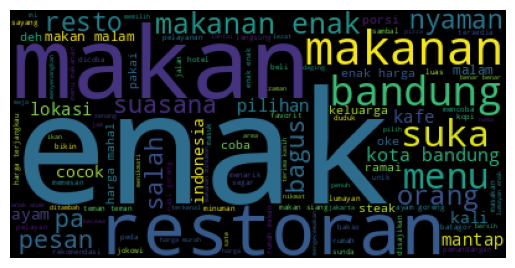

In [58]:
wordcloud = WordCloud().generate(filtered_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [59]:
text_positive = ' '.join(df_positive['text'])
text_negative = ' '.join(df_negative['text'])
text_neutral = ' '.join(df_neutral['text'])


In [60]:
my_array_pos = text_positive.split()
filtered_array_pos = [item for item in my_array_pos if item not in df_stopword ['stopword'].values]

In [61]:
my_array_neg = text_negative.split()
filtered_array_neg = [item for item in my_array_neg if item not in df_stopword ['stopword'].values]

In [62]:
my_array_neu = text_neutral.split()
filtered_array_neu = [item for item in my_array_neu if item not in df_stopword ['stopword'].values]

In [65]:
filtered_pos = ' '.join(filtered_array_pos)

In [66]:
filtered_neg = ' '.join(filtered_array_neg)

In [67]:
filtered_neu = ' '.join(filtered_array_neu)

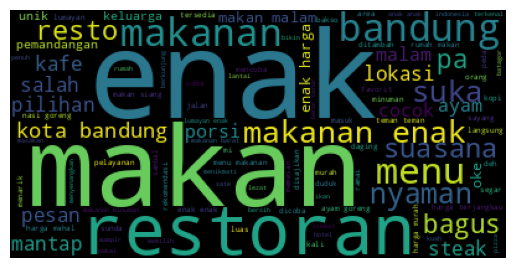

In [68]:
wordcloud = WordCloud().generate(filtered_pos)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

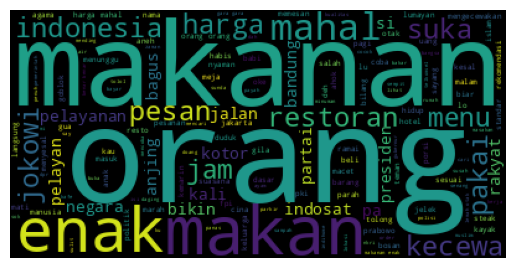

In [69]:
wordcloud = WordCloud().generate(filtered_neg)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

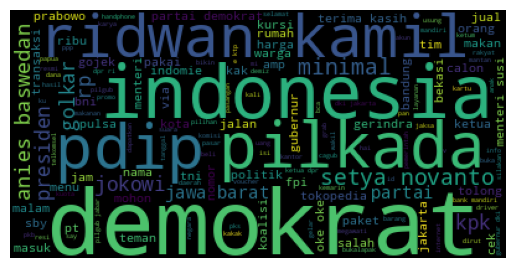

In [70]:
wordcloud = WordCloud().generate(filtered_neu)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [71]:
df.corr()

<ipython-input-71-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


total_char  total_word
total_char    1.000000    0.991289
total_word    0.991289    1.000000

<Axes: xlabel='total_word', ylabel='total_char'>

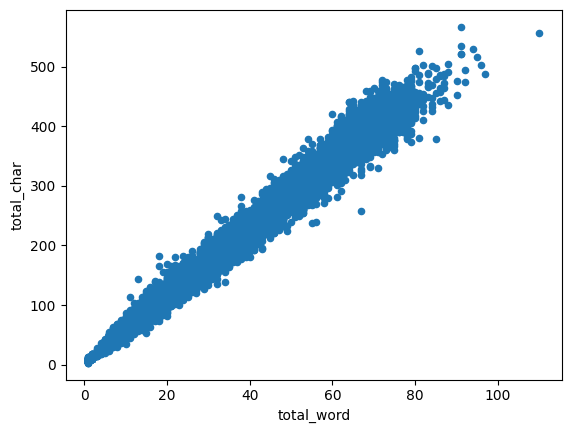

In [73]:
df.plot(x='total_word',y='total_char',kind='scatter')

<Axes: xlabel='label'>

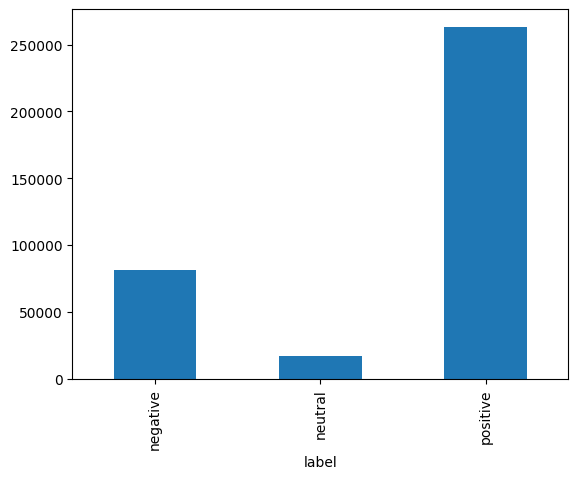

In [74]:
df.groupby('label').total_word.sum().plot(kind='bar')